In [2]:
import cells_extractor

mask = cells_extractor.get_omnipose_mask_dict("/Users/sherryyang/Documents/wiggins-lab/data/1023/xy5/masks/*.png")
set, error = cells_extractor.get_cells_set_by_mask_dict(mask)

In [3]:
import cells_extractor

mask = cells_extractor.get_mask_dict("/Users/sherryyang/Documents/wiggins-lab/data/manually_fixed/*")
set, error  = cells_extractor.get_cells_set_by_mask_dict(mask, force = True)

Frame:7, Mask label:21. Pixels number = 9. cannot make polygon. didn't create cell for this mask label.
Frame:7, Mask label:23. Pixels number = 32. cannot make polygon. didn't create cell for this mask label.
Frame:8, Mask label:1. Pixels number = 2. cannot make polygon. didn't create cell for this mask label.
Frame:12, Mask label:46. Pixels number = 1. cannot make polygon. didn't create cell for this mask label.
Frame:14, Mask label:1. Pixels number = 1. cannot make polygon. didn't create cell for this mask label.
Frame:23, Mask label:26. Pixels number = 2. cannot make polygon. didn't create cell for this mask label.
Frame:30, Mask label:59. Pixels number = 1. cannot make polygon. didn't create cell for this mask label.
Frame:30, Mask label:132. Pixels number = 13. cannot make polygon. didn't create cell for this mask label.


/Users/sherryyang/Projects/super-segger-toolkit/cells_extractor.py:75: UserWarning: Disconnected multi-pieces found on single mask/cell label
  warnings.warn(f"{e}")


Frame:32, Mask label:115. Pixels number = 7368. cannot make polygon. didn't create cell for this mask label.
Frame:32, Mask label:149. Pixels number = 32. cannot make polygon. didn't create cell for this mask label.
Frame:34, Mask label:104. Pixels number = 2. cannot make polygon. didn't create cell for this mask label.


In [4]:
error

[[7, 21],
 [7, 23],
 [8, 1],
 [12, 46],
 [14, 1],
 [23, 26],
 [30, 59],
 [30, 132],
 [30, 185],
 [32, 115],
 [32, 149],
 [33, 255],
 [34, 104],
 [34, 255]]

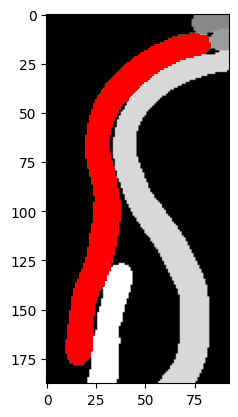

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def crop_to_bounding_box(mask, label_value, padding=0):
    # Find the coordinates of the mask where the value equals label_value
    y_indices, x_indices = np.where(mask == label_value)
    
    # If no such value is found, return None
    if not len(y_indices) or not len(x_indices):
        return None
    
    # Determine the bounding box with optional padding
    y_min, x_min = y_indices.min() - padding, x_indices.min() - padding
    y_max, x_max = y_indices.max() + padding, x_indices.max() + padding
    
    # Ensure the bounding box is within the bounds of the mask
    y_min = max(y_min, 0)
    x_min = max(x_min, 0)
    y_max = min(y_max, mask.shape[0])
    x_max = min(x_max, mask.shape[1])
    
    
    # Crop the mask to this bounding box
    cropped_mask = mask[y_min:y_max, x_min:x_max]
    
    return cropped_mask

import numpy as np

def crop_to_square_bounding_box(mask, label_value, padding=0):
    # Find the coordinates of the mask where the value equals label_value
    y_indices, x_indices = np.where(mask == label_value)
    
    # If no such value is found, return None
    if not len(y_indices) or not len(x_indices):
        return None
    
    # Determine the bounding box
    y_min, x_min = y_indices.min(), x_indices.min()
    y_max, x_max = y_indices.max(), x_indices.max()
    
    # Compute the current width and height of the bounding box
    current_width = x_max - x_min
    current_height = y_max - y_min
    
    # Determine the size of the square (the max of width and height)
    square_size = max(current_width, current_height) + 2 * padding
    
    # Calculate the center of the old bounding box
    center_x, center_y = (x_min + x_max) // 2, (y_min + y_max) // 2
    
    # Determine the new square bounding box coordinates
    x_min = max(center_x - square_size // 2, 0)
    y_min = max(center_y - square_size // 2, 0)
    x_max = x_min + square_size
    y_max = y_min + square_size
    
    # Ensure the bounding box is within the bounds of the mask
    x_min = max(0, min(x_min, mask.shape[1] - square_size))
    y_min = max(0, min(y_min, mask.shape[0] - square_size))
    x_max = min(mask.shape[1], x_min + square_size)
    y_max = min(mask.shape[0], y_min + square_size)
    
    # Crop the mask to this square bounding box
    cropped_mask = mask[y_min:y_max, x_min:x_max]
    
    return cropped_mask


# Use the function to crop the mask
cropped_mask = crop_to_bounding_box(mask[21], 9, padding=10)  # Replace 10 with the padding you want

from matplotlib.colors import ListedColormap
cmap = ListedColormap([(0, 0, 0, 0), (1, 0, 0, 1)])

# Display the cropped mask
if cropped_mask is not None:
    plt.imshow(cropped_mask, cmap='gray')
    plt.imshow(cropped_mask==9, cmap=cmap)
else:
    print("No mask found for the given label value.")


In [11]:
np.max(cropped_mask)

13

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def find_bounding_box(mask, label_value, padding=0):
    # Find where the mask equals the label_value
    y_indices, x_indices = np.where(mask == label_value)

    if not y_indices.size or not x_indices.size:
        return None  # No mask with the given label_value

    # Determine the bounding box with some padding
    x_min, y_min = x_indices.min() - padding, y_indices.min() - padding
    x_max, y_max = x_indices.max() + padding, y_indices.max() + padding
    
    # Clamp to the image size
    x_min = max(x_min, 0)
    y_min = max(y_min, 0)
    x_max = min(x_max, mask.shape[1] - 1)
    y_max = min(y_max, mask.shape[0] - 1)
    
    return (x_min, y_min, x_max, y_max)

def show_mask_on_image(img, mask, label_value, padding=10):
    # Find the bounding box of the mask
    bbox = find_bounding_box(mask, label_value, padding)
    if bbox is None:
        print("Mask with the specified label value does not exist.")
        return

    # Crop the image and the mask to the bounding box
    x_min, y_min, x_max, y_max = bbox
    cropped_mask = mask[y_min:y_max+1, x_min:x_max+1] == label_value
    
    # Create a red color mask where the mask is
    red_mask = np.zeros_like(cropped_img, dtype=np.uint8)
    red_mask[cropped_mask] = [255, 0, 0]  # RGB for red

    # Overlay the red mask on the image
    overlay_img = cropped_img.copy()
    overlay_img[red_mask.astype(bool)] = red_mask[red_mask.astype(bool)]
    
    # Display the result
    plt.figure(figsize=(8, 6))
    plt.imshow(overlay_img)
    plt.title("Mask overlay in red")
    
    # Optionally, draw the bounding box
    rect = Rectangle((x_min, y_min), x_max-x_min, y_max-y_min, linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

    plt.show()

# Assuming 'img' is your original image and 'mask' is the mask image
# Replace 'i' with the actual label value you're interested in
show_mask_on_image(mask[21], 9)


In [ ]:
set = cells_extractor.get_cells_set_by_mask_dict(mask,5)

In [ ]:
mask = cells_extractor.get_mask_dict("/Users/sherryyang/Documents/wiggins-lab/data/1023/xy5/masks/*.png")
set = cells_extractor.get_cells_set_by_mask_dict(mask)

171.5
218.0
205.5
118.5
115.5
156.0
367.0
259.5
143.5
227.0
107.5
184.0
214.0
148.5
217.5
119.5
134.0
184.0
146.5
249.5
151.0
108.5
416.5
114.0
282.0
173.0
192.5
111.5
114.0
262.0
144.0
155.0
265.5
204.0
292.5
215.0
175.0
124.0
112.5
307.0
153.0
257.5
189.0
149.5
142.5
113.5
197.5
229.5
193.0
261.5
166.0
125.0
132.5
257.5
201.0
242.0
132.0
121.0
194.0
132.5
153.0
308.5
110.0
229.5
176.0
139.0
320.5
194.5
125.5
170.0
158.0
257.0
212.0
155.0
200.5
155.0
176.0
194.5
179.5
225.5
227.5
283.5
127.5
177.0
210.5
172.5
213.0
147.0
121.0
254.0
269.5
186.5
133.5
317.5
496.0
177.0
175.0
101.0
203.0
182.5
259.0
236.5
240.0
175.0
194.5
157.5
173.5
208.5
411.5
202.5
261.5
110.5
228.5
112.0
149.5
253.5
288.5
152.0
227.5
125.5
129.0
404.5
117.5
214.0
137.5
153.5
193.0
110.0
165.0
134.0
133.0
205.0
147.5
129.0
119.0
151.0
265.0
131.5
226.5
230.0
120.5
119.0
190.0
127.0
103.5
176.5
92.0
249.0
163.0
186.5
190.0
163.5
171.0
282.5
202.5
220.0
113.0
374.5
158.5
167.5
252.5
133.5
203.5
90.5
370.0
192.5
277.5


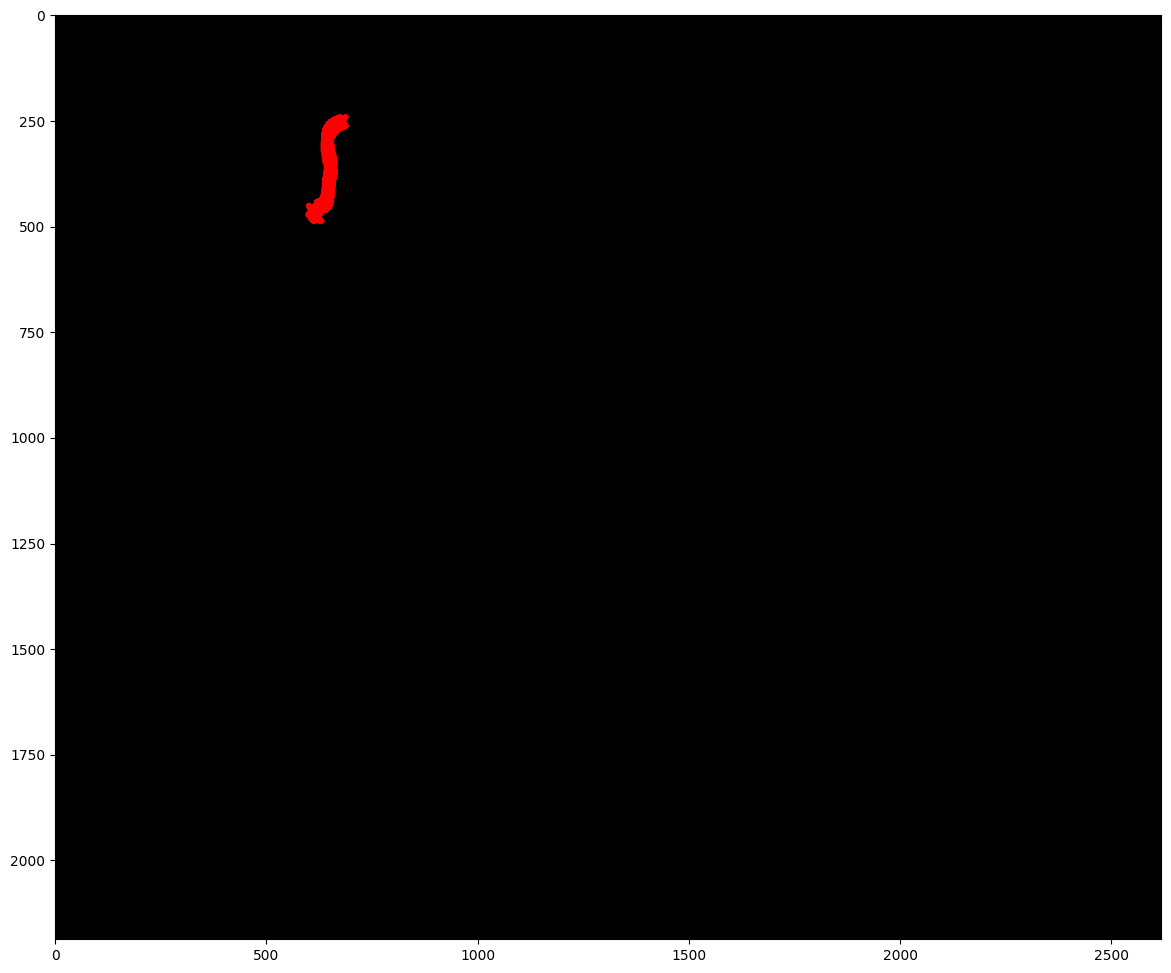

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'mask' is a numpy array
label_mask = mask[30] == 185

# Set the figure size
plt.figure(figsize=(15, 12))

# Display the mask
plt.imshow(label_mask, cmap='gray')

# Get the indices where mask[7] is equal to 23
y_indices, x_indices = np.where(label_mask)

# Iterate over the indices and annotate the pixels
for x, y in zip(x_indices, y_indices):
    plt.text(x, y, 'X', ha='center', va='center', color='red')

# Show the plot
plt.show()


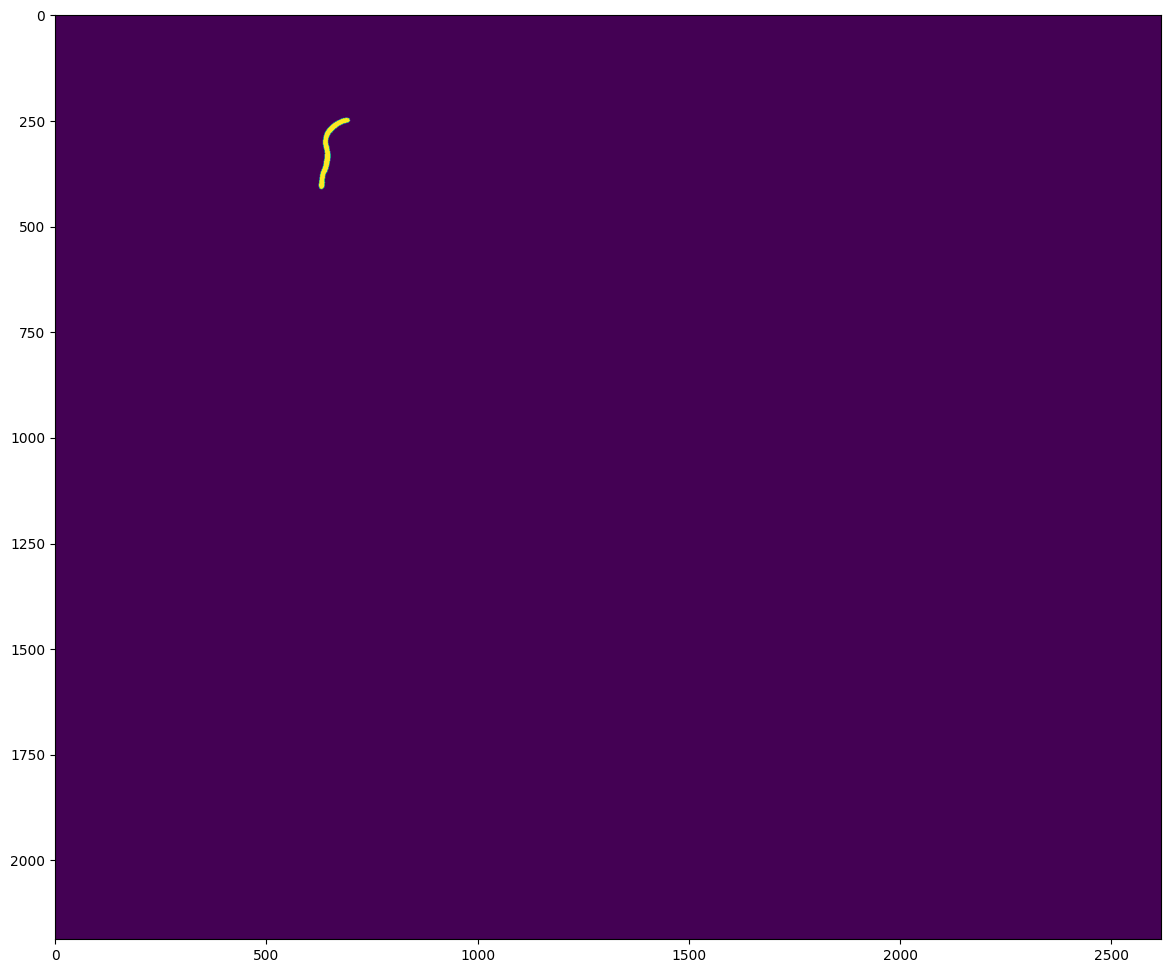

In [5]:
plt.figure(figsize=(15, 12))
plt.imshow(mask[21] == 9)

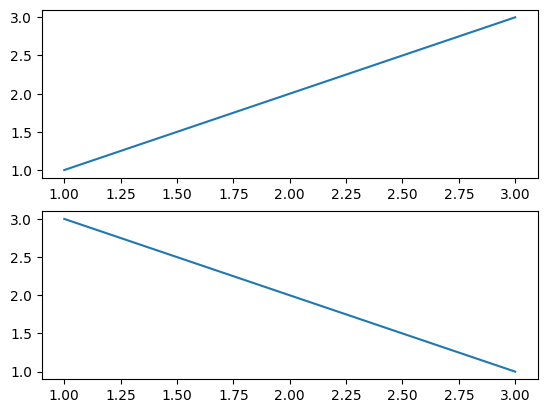

In [15]:
import matplotlib.pyplot as plt

# Example list of plotting functions (replace these with your actual plotting code)
def plot1(ax):
    ax.plot([1, 2, 3], [1, 2, 3])

def plot2(ax):
    ax.plot([1, 2, 3], [3, 2, 1])

plotting_functions = [plot1, plot2]

# Create a single figure with subplots
fig, axs = plt.subplots(len(plotting_functions))

# Loop through the plotting functions and draw each plot in a subplot
for ax, plot_func in zip(axs, plotting_functions):
    plot_func(ax)

plt.show()


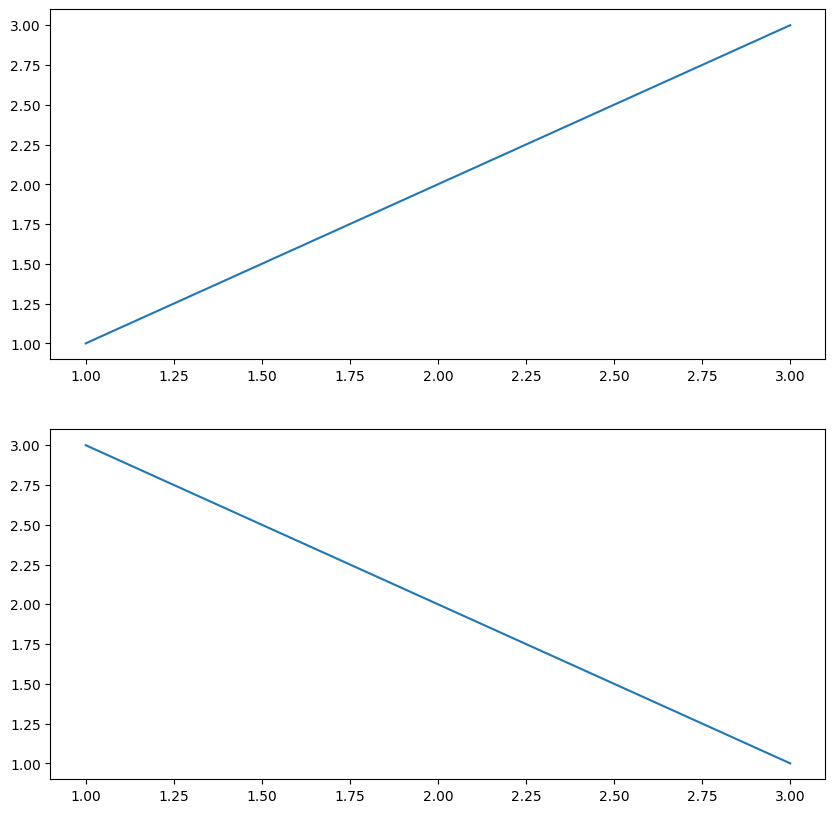

In [16]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Suppose you have a list of axes
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 1, figure=fig)  # Adjust the GridSpec layout as needed

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

# Now you can plot on ax1 and ax2 as needed
ax1.plot([1, 2, 3], [1, 2, 3])
ax2.plot([1, 2, 3], [3, 2, 1])

plt.show()


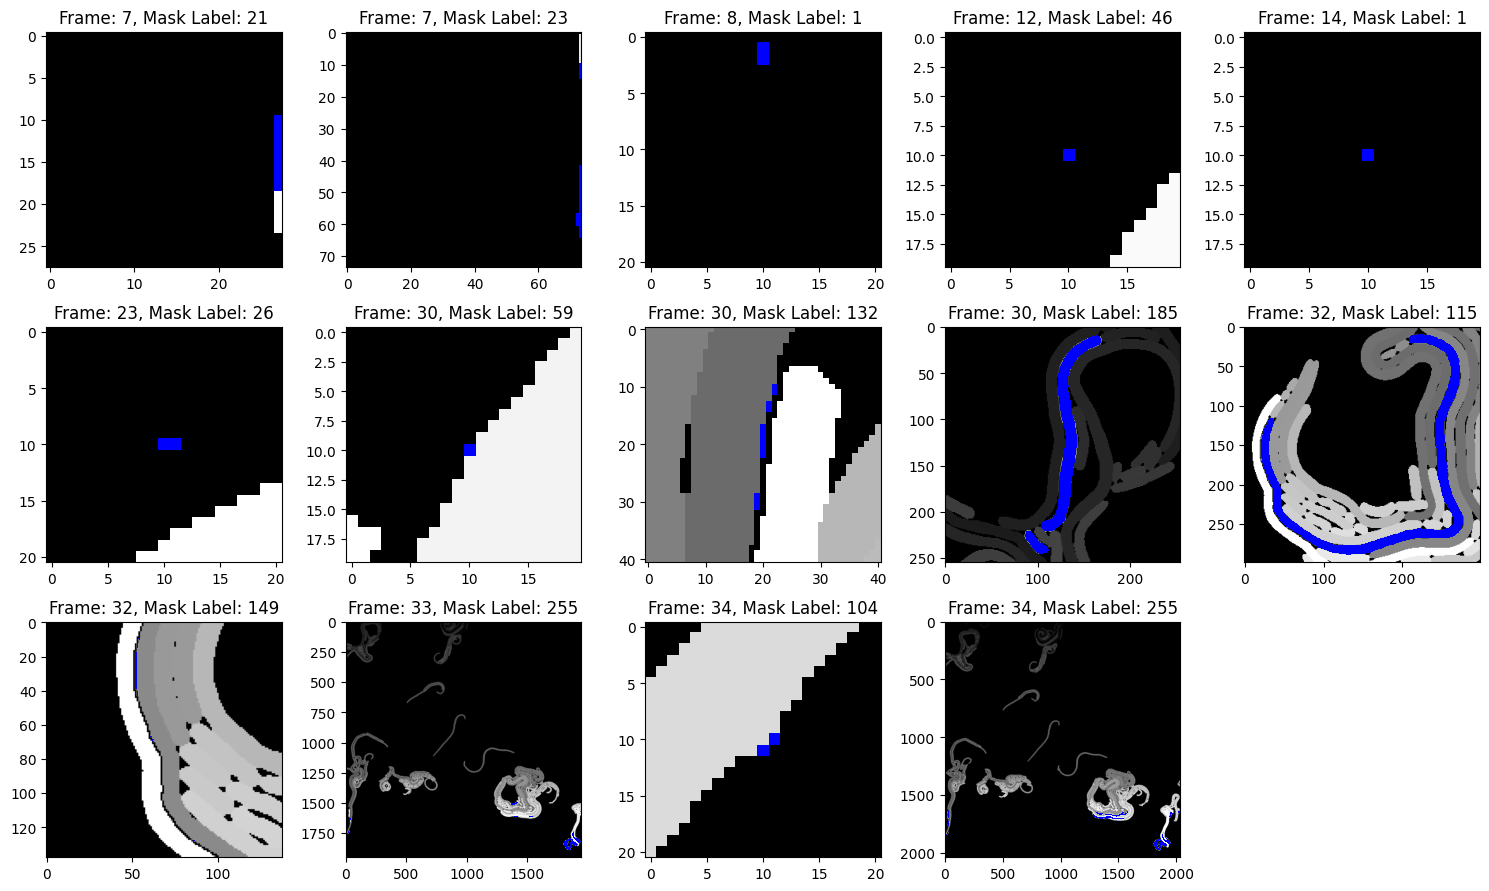

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import math


def plot_error_masks(mask, error):
    num_images = len(error)  
    num_rows = math.ceil(num_images / 5)

    # Create a large figure to hold all subplots
    fig, axs = plt.subplots(num_rows, 5, figsize=(15, 3 * num_rows))

    # Flatten the axs array for easy iteration
    axs = axs.flatten()

    cmap = ListedColormap([(0, 0, 0, 0), (0, 1, 0, 1)])
    # Loop through images and plot them
    for idx, item in enumerate(error):
        frame_index = item[0]
        mask_label = item[1]
        cropped_mask = crop_to_square_bounding_box(mask[frame_index], mask_label, padding=10) 
        axs[idx].imshow(cropped_mask, cmap='gray')
        axs[idx].imshow(cropped_mask== item[1], cmap=cmap)
        axs[idx].set_title(f"Frame: {frame_index}, Mask Label: {mask_label}")

    # Turn off any unused subplots
    for ax in axs[num_images:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [7]:
item[0] 

7